In [6]:
library(tidyverse)
library(MLmetrics)


Attaching package: ‘MLmetrics’

The following object is masked from ‘package:base’:

    Recall



In [8]:
spark  = read_tsv("/home/and/RIDIR/Datasets/AreaTablesValidation/geospark_intersections.tsv",  col_names = c("SID", "TID", "area_spark"))
head(spark %>% arrange(area_spark))
pandas = read_tsv("/home/and/RIDIR/Datasets/AreaTablesValidation/geopandas_intersections.tsv", col_names = c("SID", "TID", "area_pandas"))
head(pandas %>% arrange(area_pandas))

Parsed with column specification:
cols(
  SID = col_character(),
  TID = col_character(),
  area_spark = col_double()
)


SID,TID,area_spark
S42101008800,T42101000087,2.456980e-11
S42101020200,T42101000205,1.356739e-10
S42101006100,T42101000059,1.758677e-10
S42101018200,T42101000185,3.764062e-10
S42101006100,T42101000060,3.868170e-10
S42101018300,T42101000295,4.954286e-10


Parsed with column specification:
cols(
  SID = col_character(),
  TID = col_character(),
  area_pandas = col_double()
)


SID,TID,area_pandas
S42101008800,T42101000087,2.456980e-11
S42101020200,T42101000205,1.356739e-10
S42101006100,T42101000059,1.758677e-10
S42101018200,T42101000185,3.764062e-10
S42101006100,T42101000060,3.868170e-10
S42101018300,T42101000295,4.954286e-10


In [9]:
nrow(spark)
nrow(pandas)

[1] 1535

[1] 1535

In [10]:
table = spark %>% inner_join(pandas, by= c("SID", "TID")) %>% 
    mutate(diff = abs(area_spark - area_pandas)) %>%
    arrange(desc(diff))
nrow(table)

[1] 1535

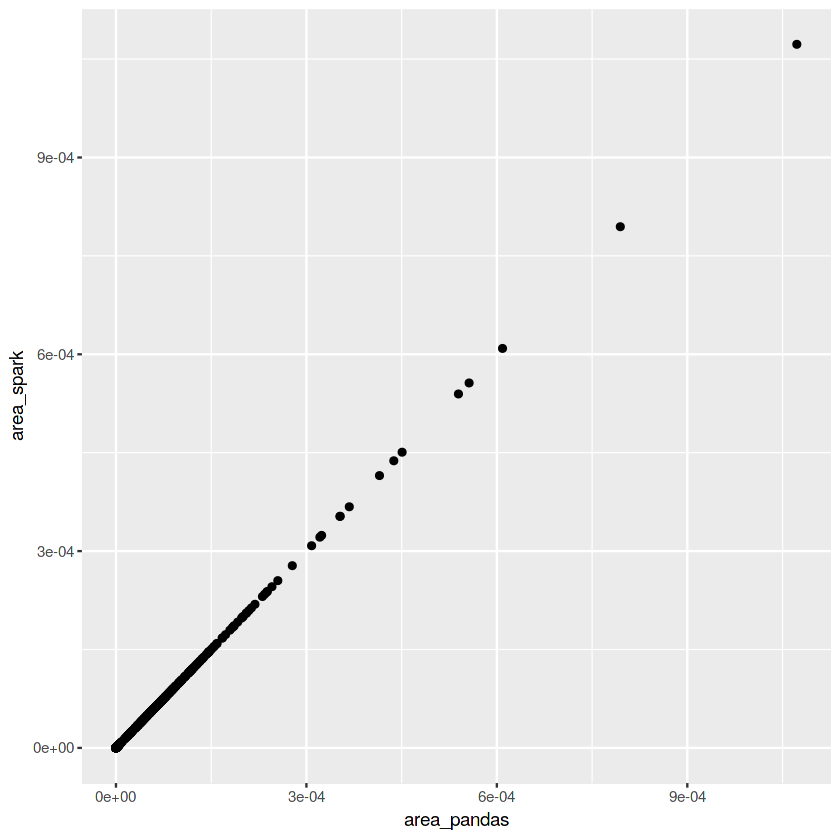

In [11]:
ggplot(data = table, aes(x = area_pandas, y = area_spark)) + geom_point()

In [14]:
print(paste("R2:   ", R2_Score(table$area_spark, table$area_pandas)))
print(paste("MAE:  ",      MAE(table$area_spark, table$area_pandas)))
print(paste("MSE:  ",      MSE(table$area_spark, table$area_pandas)))
print(paste("RMSE: ",     RMSE(table$area_spark, table$area_pandas)))
print(paste("RAE:  ",      RAE(table$area_spark, table$area_pandas)))
print(paste("MAPE: ",     MAPE(table$area_spark, table$area_pandas)))

[1] "R2:    1"
[1] "MAE:   1.64695836278361e-23"
[1] "MSE:   5.64115177666031e-44"
[1] "RMSE:  2.37511089776042e-22"
[1] "RAE:   4.91499517530793e-19"
[1] "MAPE:  1.70539285779528e-17"
